In [1]:
import pandas as pd 
df = pd.read_csv("diabetes_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [2]:
def convert(value):
    if value < 18.5:
        return 'Low'
    elif 18.5 <= value <= 25:
        return 'Normal'
    else:
        return 'High'
df['BMI'] = df['BMI'].apply(convert)

In [3]:
df.drop(['Sex', 'Fruits', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth'], axis=1, inplace=True)

In [4]:
df[list(pd.get_dummies(df['BMI']).columns)] = pd.get_dummies(df['BMI'])

In [5]:
df.drop('BMI', axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
x = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [9]:
sc = StandardScaler()

In [10]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
classifier = KNeighborsClassifier(n_neighbors=15)

In [12]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [13]:
preds = classifier.predict(x_test)

In [ ]:
print('Confusion matrix:')
print(confusion_matrix(y_test, preds))

In [ ]:
print('Accuracy score:')
print(accuracy_score(y_test, preds))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
log_reg_model = LogisticRegression()

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None,10, 20, 30]
}

In [ ]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
accuracy = best_model.score(x_test, y_test)
print(f"Best model accuracy: {accuracy}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrixni hisoblash
cm = confusion_matrix(y_test, y_pred)

# Confusion matrixni chiroyli ko‘rsatish
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Diabetes Yo'q", "Diabetes Bor"], yticklabels=["Diabetes Yo'q", "Diabetes Bor"])
plt.xlabel('Bashorat')
plt.ylabel('Haqiqiy')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Feature importance grafikasini yaratish (RandomForest uchun)
importances = rf_model.feature_importances_
features = X_train.columns

# Chiroyli grafikni chizish
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Ahmiyat')
plt.title('Feature Importance')
plt.show()


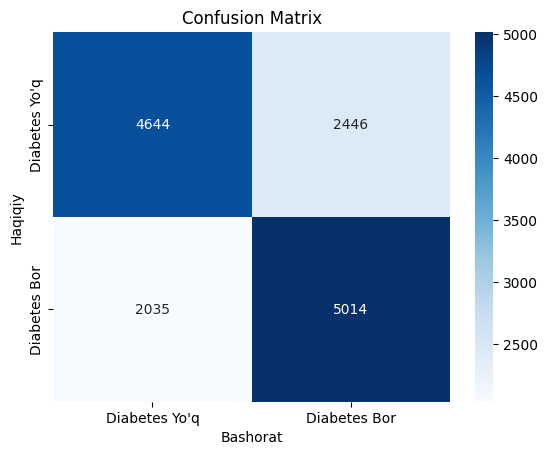

Modelning aniqligi: 0.68


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# X va y ni aniqlab olish (bu yerda 'Diabetes' ustuni maqsad)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Train-testga bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ma'lumotlarni standartlashtirish
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN model yaratish va o‘qitish
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Bashorat (predict) olish
y_pred = knn.predict(X_test)

# Confusion matrixni hisoblash
cm = confusion_matrix(y_test, y_pred)

# Grafikda ko‘rsatish
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Diabetes Yo'q", "Diabetes Bor"],
            yticklabels=["Diabetes Yo'q", "Diabetes Bor"])
plt.xlabel("Bashorat")
plt.ylabel("Haqiqiy")
plt.title("Confusion Matrix")
plt.show()

# Model aniqligini ko‘rish
acc = accuracy_score(y_test, y_pred)
print(f"Modelning aniqligi: {acc:.2f}")


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   CholCheck             70692 non-null  float64
 3   Smoker                70692 non-null  float64
 4   HeartDiseaseorAttack  70692 non-null  float64
 5   PhysActivity          70692 non-null  float64
 6   Veggies               70692 non-null  float64
 7   DiffWalk              70692 non-null  float64
 8   Stroke                70692 non-null  float64
 9   HighBP                70692 non-null  float64
 10  Diabetes              70692 non-null  float64
 11  High                  70692 non-null  bool   
 12  Low                   70692 non-null  bool   
 13  Normal                70692 non-null  bool   
dtypes: bool(3), float64(11)
memory usage: 6.1 MB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   CholCheck             70692 non-null  float64
 3   Smoker                70692 non-null  float64
 4   HeartDiseaseorAttack  70692 non-null  float64
 5   PhysActivity          70692 non-null  float64
 6   Veggies               70692 non-null  float64
 7   DiffWalk              70692 non-null  float64
 8   Stroke                70692 non-null  float64
 9   HighBP                70692 non-null  float64
 10  Diabetes              70692 non-null  float64
 11  High                  70692 non-null  bool   
 12  Low                   70692 non-null  bool   
 13  Normal                70692 non-null  bool   
dtypes: bool(3), float64(11)
memory usage: 6.1 MB


In [30]:
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.drop("Diabetes", axis=1).values
y = df['Diabetes'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [37]:
class DiabetsModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(X_train.shape[1], 16),
            nn.ReLu(),
            nn.Linear(16, 8),
            nn.ReLu(),
            nn.Linear(8, 1),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        return self.net(x)

model = DiabetesModel()

In [38]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
epochs = 50
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch (epoch+1)/{epochs}, Lost: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    predicted = (y_pred > 0.5).float()
    acc = (predicted.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()
    print(f"Test accuracy: {acc:.2f}")


Epoch (epoch+1)/50, Lost: 0.6054
Epoch (epoch+1)/50, Lost: 0.5924
Epoch (epoch+1)/50, Lost: 0.5811
Epoch (epoch+1)/50, Lost: 0.5718
Epoch (epoch+1)/50, Lost: 0.5646
Test accuracy: 0.50
